<a href="https://colab.research.google.com/github/rajeshpahari/Deep-Learning/blob/main/Pytorch_Cross_validations_DataLoader_drop_Last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment with different parameters**
lr=.0005,.01,.001
batch sizes=16,4,54

See the variance in model

In [63]:
#Import libraries
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader,TensorDataset


In [64]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
#convert data to tensor
data=torch.tensor(iris[iris.columns[0:4]].values).float()

#Create labels & convert in numeric
labels=torch.zeros(len(data),dtype=torch.long)
#iris.species.unique()
labels[iris.species=='versicolor']=1
labels[iris.species=='virginica']=2
#labels

In [66]:
#Split Train & Test data
train_data, test_data, train_label, test_label = train_test_split(data, labels, train_size=.8)

#Convert train & Test data to Pytorch Tensolr...get features & targets together
train_data=TensorDataset(train_data,train_label)
test_data=TensorDataset(test_data,test_label)

#finally translate train and test data in dataloader
batchsize=54
train_loader=DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader=DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [67]:
for X,y in train_loader:

  print(X.shape,y.shape)
#X,y
#Notice final matrix is of different size...lets discard it..

torch.Size([54, 4]) torch.Size([54])
torch.Size([54, 4]) torch.Size([54])


In [68]:

#############Create a Model
def createNewModel():
  #Model Architecture
  ANNiris = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64,3),
  )

  #Define Loss function
  lossfunc=nn.CrossEntropyLoss()
  #Define Optimizer
  optimizer=torch.optim.SGD(ANNiris.parameters(),lr=.0005)

  #return
  return ANNiris,lossfunc,optimizer

In [69]:
###################Train te Model


###Global Parameters
numepochs=2500

###Train the Model- Create a function
def trainModel():

  ##Intialize Accuracies for the epoch- each epoch only
  trainacc=[]
  testacc=[]

  # Perform each Epoch- First Loop

  for epochi in range(numepochs):

    #Loop for each Batches- Second Loop
    batchacc=[] # accuracy for each batch
    for X,y in train_loader:

      #foorward pass
      yHat=ANNiris(X)

      #calculate loss
      loss=lossfunc(yHat,y)

      #backpropos
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #Bath accuracy
      batchacc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())

      #End of batch Loop


    #Avarage training accuracy of all bacthes...we are in for loop ---out of batch loop
    trainacc.append(np.mean(batchacc))

    ##In each epoch calculate test accuracy

    #feedforward for test data which is in only one batch..devide data from test loader in test-features and test_targets
    X,y=next(iter(test_loader))
    #predlabels=torch.argmax(ANNiris(X),axis=1)
    testacc.append(100*torch.mean((torch.argmax(ANNiris(X),axis=1)==y).float()).item())

  #Return Accuracies
  return trainacc,testacc













In [70]:
#Create Model
ANNiris,lossfunc,optimizer=createNewModel()
trainacc,testacc=trainModel()



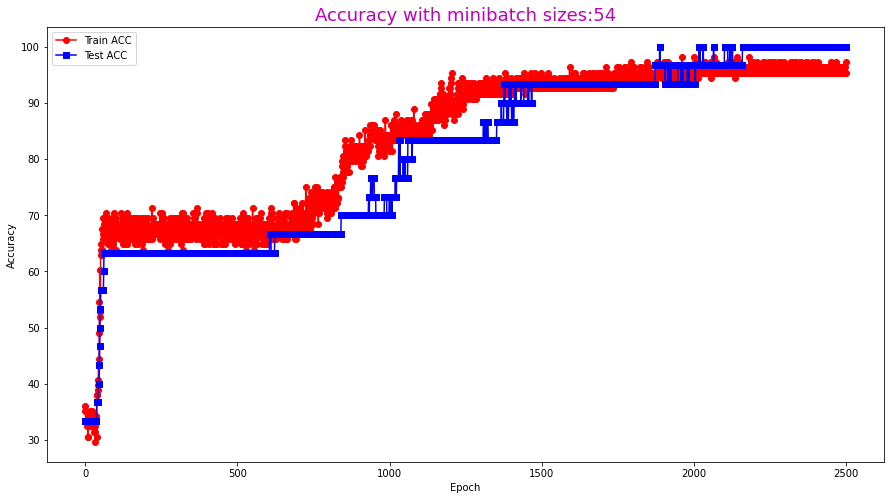

In [71]:
fig=plt.figure(figsize=(15,8))

plt.plot(trainacc,'ro-')
plt.plot(testacc,'bs-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy with minibatch sizes:'+str(batchsize),fontsize=18,color='m')
plt.legend(['Train ACC','Test ACC'])
plt.show()

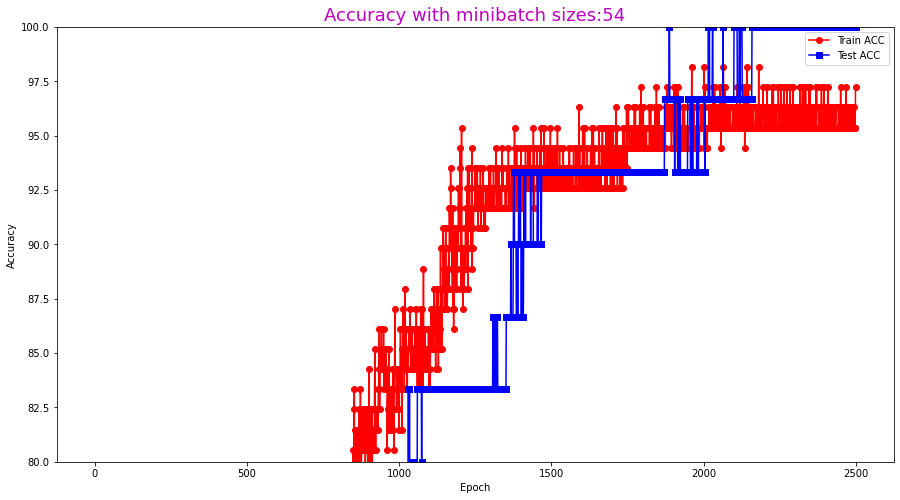

In [72]:
ig=plt.figure(figsize=(15,8))

plt.plot(trainacc,'ro-')
plt.plot(testacc,'bs-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy with minibatch sizes:'+str(batchsize),fontsize=18,color='m')
plt.ylim([80,100])
plt.legend(['Train ACC','Test ACC'])
plt.show()